# Anomalie globale de température (HadCRUT 1850-2020)

Auteur : Frédéric FERRY (ENM) - janvier 2021

- HadCRUT5 :
https://www.metoffice.gov.uk/hadobs/hadcrut5/data/current/download.html

- Données nécessaires pour ce calepin :
https://www.metoffice.gov.uk/hadobs/hadcrut5/data/current/analysis/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc
https://www.metoffice.gov.uk/hadobs/hadcrut5/data/current/analysis/diagnostics/HadCRUT.5.0.1.0.analysis.summary_series.global.annual.nc

- Graphiques "en bandes" d'après #ShowYourStripes d'Ed Hawkins (University of Reading) :
https://showyourstripes.info
https://twitter.com/ed_hawkins

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib import animation

import pandas as pd
import xarray as xr

from cartopy import config
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes

In [6]:
t    = xr.open_dataset("./data/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc")
print(t)
tyear=t.sel(time=slice('1850','2021')).groupby('time.year').mean('time', skipna=False)

years=tyear.year.values
lat=tyear.latitude.values

lon=tyear.longitude.values
print(years)

data=tyear['tas_mean']
print(data.shape)

<xarray.Dataset>
Dimensions:           (time: 2066, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time              (time) datetime64[ns] 1850-01-16T12:00:00 ... 2022-02-15
  * latitude          (latitude) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude         (longitude) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
    realization       int64 ...
Dimensions without coordinates: bnds
Data variables:
    tas_mean          (time, latitude, longitude) float64 ...
    time_bnds         (time, bnds) datetime64[ns] ...
    latitude_bnds     (latitude, bnds) float64 ...
    longitude_bnds    (longitude, bnds) float64 ...
    realization_bnds  (bnds) int64 ...
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      Data set built at: 2022-03-24T15:49:35+00:00
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...


In [7]:
def plot_background(ax):
    ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
    return ax

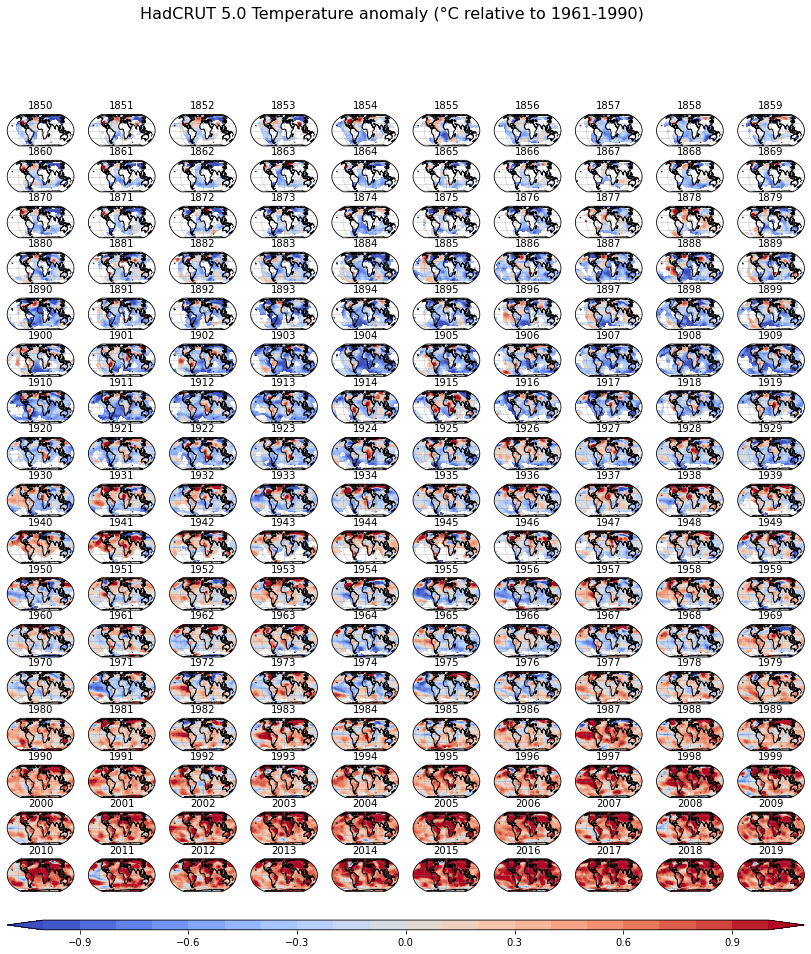

In [8]:
#plt.style.use('dark_background')

proj=ccrs.EqualEarth()

levels=np.arange(-1,1.1, 0.1)

axes_class = (GeoAxes, dict(map_projection=proj))
fig = plt.figure(figsize=(15,15))
fig.suptitle('HadCRUT 5.0 Temperature anomaly (°C relative to 1961-1990)', fontsize=16)

axgr = AxesGrid(fig, 111, axes_class=axes_class,
       nrows_ncols=(17, 10),
       axes_pad=0.2,
       cbar_location='bottom',
       cbar_mode='single', # None/single/each
       cbar_pad=0.2,
       cbar_size='3%',
       label_mode='')  # note the empty label_mode

start,stop = 0,len(years)-1

for i, ax in enumerate(axgr[:stop-start]):
   plot_background(ax)
   ax.set_title(str(years[i]), fontsize=10)
   p1 = ax.contourf(lon, lat, data[i,:,:], levels=levels, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')
   #p2 = ax.contour(lon, lat, data[i,:,:], colors='black', levels=levels, linewidths=0.2, transform=ccrs.PlateCarree())
   axgr.cbar_axes[i].colorbar(p1)
   
plt.show()

figname='./figs/HadCRUT5_Tanom'
fig.savefig(figname+'.png',bbox_inches='tight')

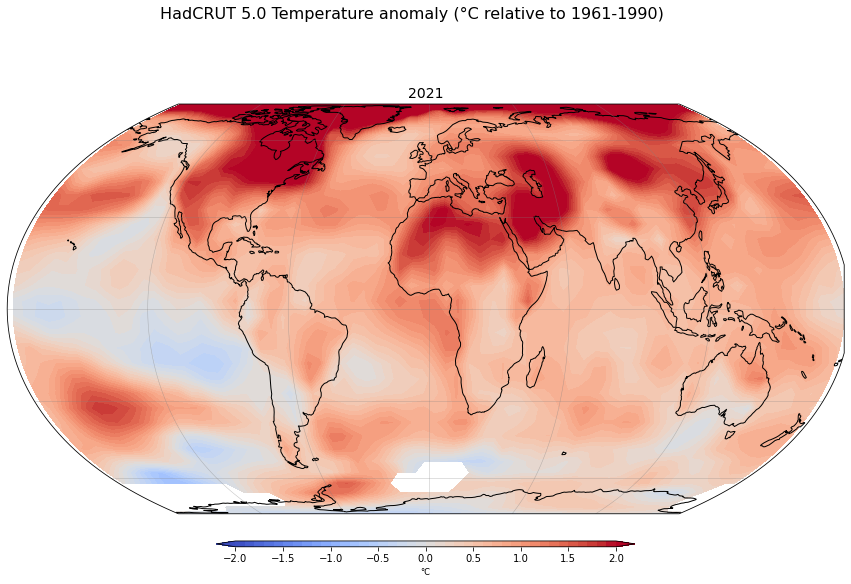

In [9]:
iyear=2021
idx = list(years).index(iyear)

proj=ccrs.EqualEarth()

levels=np.arange(-2,2.1, 0.1)

fig = plt.figure(figsize=(15,10))
fig.suptitle('HadCRUT 5.0 Temperature anomaly (°C relative to 1961-1990)', fontsize=16)
ax = fig.add_subplot(1, 1, 1, projection=proj)
plot_background(ax)
ax.set_title(str(iyear), fontsize=14)
p1 = ax.contourf(lon, lat, data[idx,:,:], levels=levels, transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')
#p2 = ax.contour(lon, lat, data[idx,:,:], colors='black', levels=levels, linewidths=0.2, transform=ccrs.PlateCarree())
cb = fig.colorbar(p1, orientation='horizontal', aspect=65, shrink=0.5, pad=0.05)
cb.set_label('°C', size='small')   
plt.show()

figname='./figs/HadCRUT5_Tanom_'+str(iyear)
fig.savefig(figname+'.png',bbox_inches='tight')

In [10]:
for i in range(len(years)): 
    fig = plt.figure(figsize=(15,10))
    fig.suptitle('HadCRUT 5.0 Temperature anomaly (°C relative to 1961-1990)', fontsize=16)
    ax = fig.add_subplot(1, 1, 1, projection=proj)
    plot_background(ax)
    ax.set_global()
    ax.set_title(str(years[i]), fontsize=14)
    p1 = ax.contourf(lon, lat, data[i,:,:], levels=levels, transform=ccrs.PlateCarree(),
                     cmap='coolwarm', extend='both')
    #p2 = ax.contour(lon, lat, data[i,:,:], colors='black', levels=levels, linewidths=0.2, transform=ccrs.PlateCarree())
    cb = fig.colorbar(p1, orientation='horizontal', aspect=65, shrink=0.5, pad=0.05)
    cb.set_label('°C', size='small')   
    figname='./anim/HadCRUT5_Tanom_'+str(years[i])
    fig.savefig(figname+'.png',bbox_inches='tight')
    plt.close()

<xarray.Dataset>
Dimensions:           (time: 173, bnds: 2)
Coordinates:
  * time              (time) datetime64[ns] 1850-07-02T12:00:00 ... 2022-07-0...
    latitude          float64 ...
    longitude         float64 ...
    realization       int64 ...
Dimensions without coordinates: bnds
Data variables:
    tas_mean          (time) float64 ...
    time_bnds         (time, bnds) datetime64[ns] ...
    latitude_bnds     (bnds) float64 ...
    longitude_bnds    (bnds) float64 ...
    realization_bnds  (bnds) int64 ...
    tas_lower         (time) float64 ...
    tas_upper         (time) float64 ...
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      Data set built at: 2022-05-16T09:57:56+00:00
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H

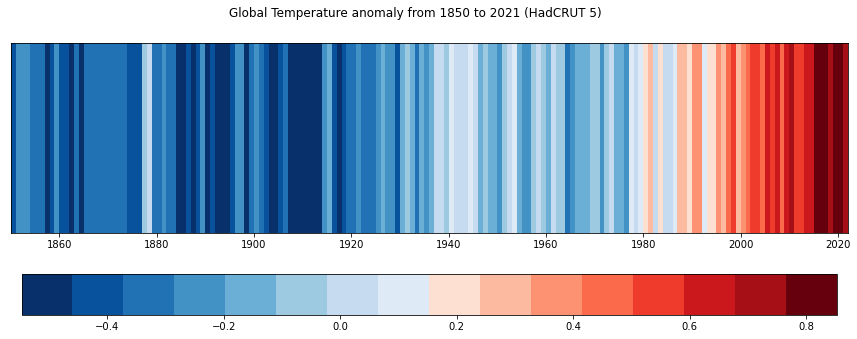

In [17]:
t    = xr.open_dataset("./data/HadCRUT.5.0.1.0.analysis.summary_series.global.annual.nc")
print(t)

# Reference period for the center of the color scale
FIRST_REFERENCE = 1971
LAST_REFERENCE = 2000
LIM = 0.7 # degrees

FIRST = '1850'
LAST = '2021'  # inclusive

# Reference period for the center of the color scale
FIRST_REFERENCE = '1971'
LAST_REFERENCE = '2000'

t_anom = t.sel(time=slice(FIRST, LAST))
t_ref = t_anom.sel(time=slice(FIRST_REFERENCE, LAST_REFERENCE)).mean('time')

anomaly=t_anom['tas_mean']
reference=t_ref['tas_mean']

#print(reference)

# the 8 more saturated colors from the 9 blues / 9 reds
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Global Temperature anomaly from '
             +str(FIRST)+' to '+str(LAST)+' (HadCRUT 5)', fontsize=12)

#ax = fig.add_axes([0, 0, 1, 1])
ax=fig.add_subplot(111)

# create a collection with a rectangle for each year
col = PatchCollection([Rectangle((y, 0), 1, 1) for y in range(int(FIRST), int(LAST) + 1) ])

# set data, colormap and color limits
col.set_array(anomaly)
col.set_cmap(cmap)
col.set_clim(reference - LIM, reference + LIM)
ax.add_collection(col)
ax.set_ylim(0, 1)
ax.set_xlim(int(FIRST), int(LAST) + 1)

#ax.set_axis_off()
ax.get_yaxis().set_visible(False)
plt.colorbar(col, orientation="horizontal")

fig.savefig('./figs/HadCRUT5_Global_Tanom_warming-stripes.png')